In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import random
import warnings
warnings.filterwarnings('ignore')
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout

In [2]:
# --------------------------------------
#  Configs
#
df = pd.read_csv("C:/Users/bberg/Desktop/Programs/PFL_MMA/PFL_Rolling_DB.csv",delimiter=',',index_col='Date',parse_dates=True)
min_fights_required = 101
start_date = datetime(1993,11,12)
fight_date = datetime(2021,12,21)
master_values = []


df = df.replace(np.nan,df.median())

In [3]:
test = df.loc[df.index >= '2021-01-01']
df = df.loc[df.index < '2021-01-01']

In [4]:

# ------------------------------------
#  Filter Function
#
def filter_df(name,fdate):
        temp = df[df['Fighter'] == name]
        temp = temp[temp.index < fdate]

        return temp
return_values = []

predictors = df[[
 'Takedown %',
 'Sig. Str. Per KnockDown',
 'Odds']]
#predictors = df[['Red Corner','']]
n_cols = predictors.shape[1]
target = to_categorical(df.Win)
df1 = df[df.index <= fight_date]

In [5]:


bigX = []
for i,f in enumerate(df1['Fighter']):  # loops through ALL the fights to train the model
        x = []
        for feat in predictors:
                if i % 2 == 0:
                    opp = i + 1
                    x.append(df1[feat][i] - df1[feat][opp])
                else:
                    x.append(df1[feat][i] - df1[feat][i-1])


        bigX.append(x)

X = np.asarray(bigX)







In [6]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target,stratify=target, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [7]:
model = Sequential()
model.add(Dense(12, activation='sigmoid',input_shape=(n_cols,)))
model.add(Dropout(0.4))
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

# Compile model
model.compile(loss='mean_squared_logarithmic_error', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 100, epochs = 300)



Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.5011
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.4831
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.5756
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.4741
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.5543
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.4888
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.5285
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.5228
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.5224
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.4563
Epoch 11/300
4/4 [===========

4/4 [==============================] - 0s 997us/step - loss: 0.1269 - accuracy: 0.5175
Epoch 85/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.4896
Epoch 86/300
4/4 [==============================] - 0s 998us/step - loss: 0.1294 - accuracy: 0.4837
Epoch 87/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.4695
Epoch 88/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.4689
Epoch 89/300
4/4 [==============================] - 0s 665us/step - loss: 0.1262 - accuracy: 0.5443
Epoch 90/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.4568
Epoch 91/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.4838
Epoch 92/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.5505
Epoch 93/300
4/4 [==============================] - 0s 665us/step - loss: 0.1360 - accuracy: 0.4383
Epoch 94/300
4/4 [=======

4/4 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.4748
Epoch 167/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.4915
Epoch 168/300
4/4 [==============================] - 0s 998us/step - loss: 0.1268 - accuracy: 0.5312
Epoch 169/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.5582
Epoch 170/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1307 - accuracy: 0.4865
Epoch 171/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.4638
Epoch 172/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.4645
Epoch 173/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.4851
Epoch 174/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.4963
Epoch 175/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.4691
Epoch 176/300
4/4 [===

4/4 [==============================] - 0s 998us/step - loss: 0.1284 - accuracy: 0.4915
Epoch 249/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.5344
Epoch 250/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.5156
Epoch 251/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.4618
Epoch 252/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.5005
Epoch 253/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.5512
Epoch 254/300
4/4 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.4945
Epoch 255/300
4/4 [==============================] - 0s 998us/step - loss: 0.1265 - accuracy: 0.5126
Epoch 256/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.4785
Epoch 257/300
4/4 [==============================] - 0s 665us/step - loss: 0.1287 - accuracy: 0.5190
Epoch 258/300
4/4 

In [8]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


model.save("C:/Users/bberg/Desktop/Programs/PFL_MMA/Project ANN.h5")

Accuracy is  46.15384615384615
              precision    recall  f1-score   support

           0       0.48      0.93      0.63        45
           1       0.00      0.00      0.00        46

   micro avg       0.46      0.46      0.46        91
   macro avg       0.24      0.47      0.32        91
weighted avg       0.24      0.46      0.31        91
 samples avg       0.46      0.46      0.46        91



In [9]:
#Validation Set

In [10]:
# Part 3 Validation Set for 2021
# ------------------------------------
#  Filter Function
#
def filter_test(name,fdate):
        temp = test[test['Fighter'] == name]
        temp = temp[temp.index < fdate]

        return temp
return_values = []

predictors = df[[
 'Takedown %',
 'Sig. Str. Per KnockDown',
 'Odds']]

n_cols = predictors.shape[1]
target = to_categorical(test.Win)





test1 = test[test.index <= fight_date]
bigX = []
for i,f in enumerate(test1['Fighter']):  # loops through ALL the fights to train the model
        x = []
        for feat in predictors:
                if i % 2 == 0:
                    opp = i + 1
                    x.append(test1[feat][i] - test1[feat][opp])
                else:
                    x.append(test1[feat][i] - test1[feat][i-1])


        bigX.append(x)

X_valid = np.asarray(bigX)
X_valid = scaler.transform(X_valid)






predicted_y = model.predict(X_valid)

predicted_y = predicted_y > .5

print("Accuracy is ", accuracy_score(predicted_y,target)*100)

Accuracy is  53.06122448979592


In [11]:
predicted_y = [1 if predicted_y[x][1] == True else 0 for x,y in enumerate(predicted_y)]

In [12]:
test['Profit'] = 0
for x,y in enumerate(test['Win']):
    if int(y) == 1:
        if int(test['Odds'][x]) > 0 :
            test['Profit'][x] = int(test['Odds'][x])
        else:
            test['Profit'][x] = 100
    elif int(y) == 0:
        if int(test['Odds'][x]) > 0 :
            test['Profit'][x] = -100
        else:
            test['Profit'][x] = int(test['Odds'][x])
            
test.head()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Sig. Str. Per KnockDown,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,Anthony Pettis,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,-590,0,0,-590
2021-04-23,Clay Collard,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,400,0,1,400
2021-04-23,Natan Schulte,144,228,133,238,67,97,37,63,401,...,401.0,84.428571,-0.027778,0.070547,0.072755,0.10342,-500,10,0,-500
2021-04-23,Marcin Held,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,350,0,1,350
2021-04-23,Movlid Khaybulaev,1,1,9,19,1,1,8,8,38,...,38.0,0.000000,0.000000,0.209394,0.526316,0.00000,-400,2,1,100


In [13]:
test['Prediction'] = predicted_y          
test.head()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Opp Sig. Str. Per KnockDown,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit,Prediction
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-23,Anthony Pettis,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,-590,0,0,-590,0
2021-04-23,Clay Collard,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,400,0,1,400,0
2021-04-23,Natan Schulte,144,228,133,238,67,97,37,63,401,...,84.428571,-0.027778,0.070547,0.072755,0.10342,-500,10,0,-500,0
2021-04-23,Marcin Held,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.00000,350,0,1,350,0
2021-04-23,Movlid Khaybulaev,1,1,9,19,1,1,8,8,38,...,0.000000,0.000000,0.209394,0.526316,0.00000,-400,2,1,100,0


In [14]:
test['Predicted_Profit'] = test['Prediction'] * test['Profit']

In [15]:
test.tail()

,Fighter,Sig. Str. Leg,Sig. Str. Leg Attempts,Opp Sig. Str. Leg,Opp Sig. Str. Leg Attempts,Sig. Str. Ground Landed,Sig. Str. Ground Attempts,Opp Sig. Str. Ground Landed,Opp Sig. Str. Ground Attempts,Total Strikes Landed,...,Sig. Str. Punches Diff,Sig. Str. Diff,Sig. Str. Leg Diff,Sig. Str. Ground Diff,Odds,Total Wins,Win,Profit,Prediction,Predicted_Profit
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-27,Jordan Young,7,9,9,10,7,7,24,27,18,...,0.25,0.023810,-0.122222,0.111111,500,0,1,500,0,0
2021-10-27,Julia Budd,0,0,0,0,0,0,0,0,0,...,0.00,0.000000,0.000000,0.000000,-510,0,1,100,0,0
2021-10-27,Kaitlin Young,33,42,38,55,5,5,21,22,146,...,-0.50,-0.088928,0.094805,0.045455,375,1,0,-100,0,0
2021-10-27,Don Madge,0,0,0,0,0,0,0,0,0,...,0.00,0.000000,0.000000,0.000000,-760,0,1,100,0,0
2021-10-27,Nate Williams,0,0,0,0,0,0,0,0,0,...,0.00,0.000000,0.000000,0.000000,525,0,0,-100,0,0


845


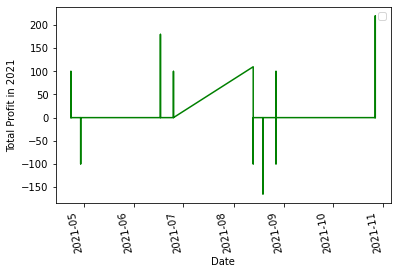

In [16]:
print(test['Predicted_Profit'].sum())
if test['Predicted_Profit'].sum() > 0:
    w_l = 'Green'
else:
    w_l = 'Red'
test['Predicted_Profit'].plot(kind='line',color=w_l)
plt.xlabel('Date')
plt.ylabel("Total Profit in 2021")
plt.xticks(rotation=100)
plt.legend('')
plt.draw()